In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tqdm
from numba import njit, prange

import generator
import fast_generator
from cmaps import *

# Generating a forest

In [21]:
forest = fast_generator.generate_forest(8,2,temp=1.5, maxiter=1000000)

completed in 2856 iterations
merge pattern found after 526 iterations, temp = 1500e-3


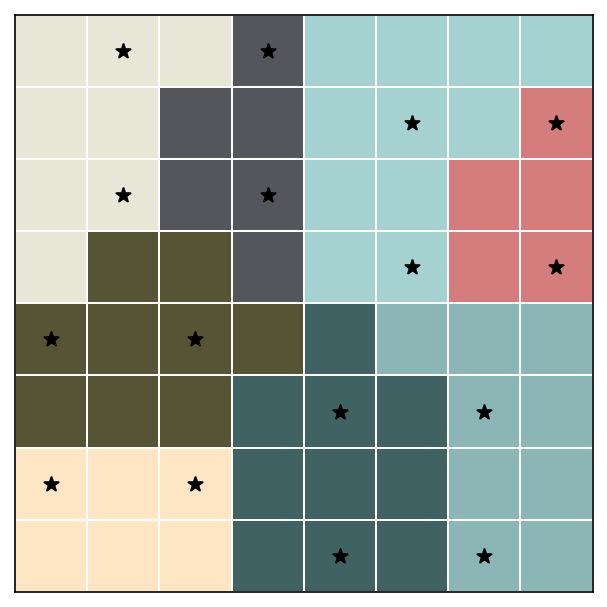

In [22]:
fast_generator.plot_forest(forest, solution=True, cmap=desert_cmap())

# Depth first search of a simple forest

In [ ]:
trees = fast_generator.plant_trees(6, 1, maxiter = 1000000)
plt.imshow(trees)

In [ ]:
start = time.time()
singular_roots = fast_generator.generate_singular_roots(trees)
print(f"time = {time.time() - start}")
plt.imshow(singular_roots)

In [ ]:
start = time.time()
solutions, visited = generator.place_tree(singular_roots)
print(f"time = {time.time() - start}")

if len(solutions) == 1:
    plt.imshow(solution)
else:
    fig, ax = plt.subplots(1, len(solutions), figsize=(len(solutions)*2, 2))
    for i,solution in enumerate(solutions):
        ax[i].imshow(solution)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

# Components of forest generation

completed in 31 iterations


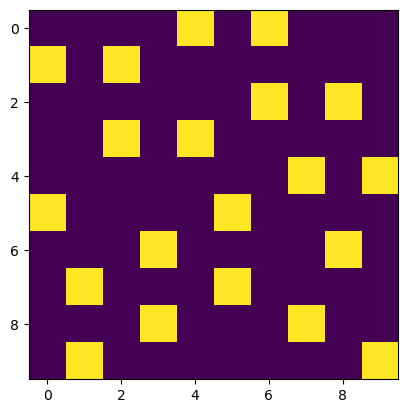

In [25]:
trees = fast_generator.plant_trees(10, 2, maxiter = 1000000)

plt.imshow(trees)

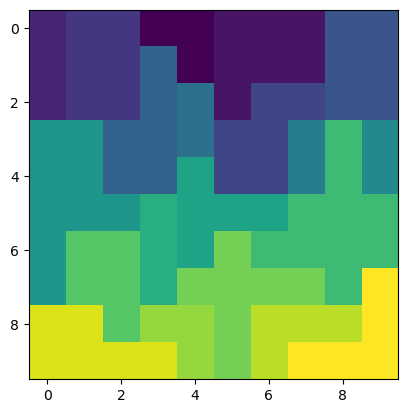

In [26]:
singular_roots = fast_generator.generate_singular_roots(trees)
plt.imshow(singular_roots)

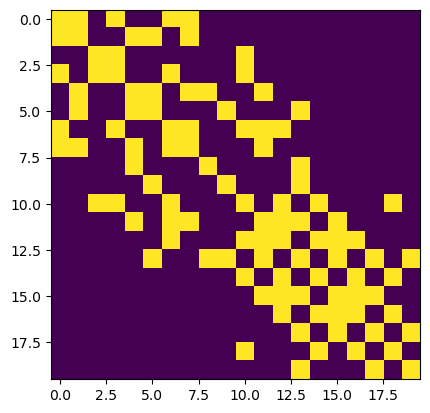

In [27]:
adj_mat = fast_generator.adj_mat_from_roots(singular_roots)
plt.imshow(adj_mat)

In [29]:
%timeit roots = fast_generator.merge_roots(singular_roots, temp=1.5, maxiter=1000000)

merge pattern found after 5692 iterations, temp = 1576e-3
merge pattern found after 913 iterations, temp = 1500e-3
merge pattern found after 1647 iterations, temp = 1515e-3
merge pattern found after 2992 iterations, temp = 1530e-3
merge pattern found after 1780 iterations, temp = 1515e-3
merge pattern found after 2147 iterations, temp = 1530e-3
merge pattern found after 5740 iterations, temp = 1576e-3
merge pattern found after 1708 iterations, temp = 1515e-3
merge pattern found after 1650 iterations, temp = 1515e-3
merge pattern found after 4133 iterations, temp = 1560e-3
merge pattern found after 70 iterations, temp = 1500e-3
merge pattern found after 232 iterations, temp = 1500e-3
merge pattern found after 302 iterations, temp = 1500e-3
merge pattern found after 1004 iterations, temp = 1515e-3
merge pattern found after 1465 iterations, temp = 1515e-3
merge pattern found after 649 iterations, temp = 1500e-3
merge pattern found after 4074 iterations, temp = 1560e-3
merge pattern found 

In [ ]:
forest = np.stack((trees,roots))

In [ ]:
fast_generator.plot_forest(forest, solution=True, cmap=desert_cmap())